Perform linear regression with L1 (Lasso) and L2 (Ridge) regularization to predict the price of a House. Use hyper-parameter tuning for the best result. Evaluate the accuracy of the models by computing relevant performance metrics, including the R² value. Generate and display a plot that compares the actual values to the predicted values (Actual vs Predicted) for both tasks.   

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('housing_price_dataset.csv')

data.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


In [5]:
label = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
  data[col] = label.fit_transform(data[col])
X = data.drop('Price', axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
params = {'alpha': [0.01, 0.1, 1, 10, 100]}

In [6]:
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, params, cv=5)
lasso_cv.fit(X_train, y_train)
y_pred_lasso = lasso_cv.predict(X_test)
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, params, cv=5)
ridge_cv.fit(X_train, y_train)
y_pred_ridge = ridge_cv.predict(X_test)
print("Best Lasso α:", lasso_cv.best_params_)
print("Best Ridge α:", ridge_cv.best_params_)
print("Lasso R²:", r2_score(y_test, y_pred_lasso))
print("Ridge R²:", r2_score(y_test, y_pred_ridge))

Best Lasso α: {'alpha': 10}
Best Ridge α: {'alpha': 1}
Lasso R²: 0.9179807336083488
Ridge R²: 0.9179760020281242


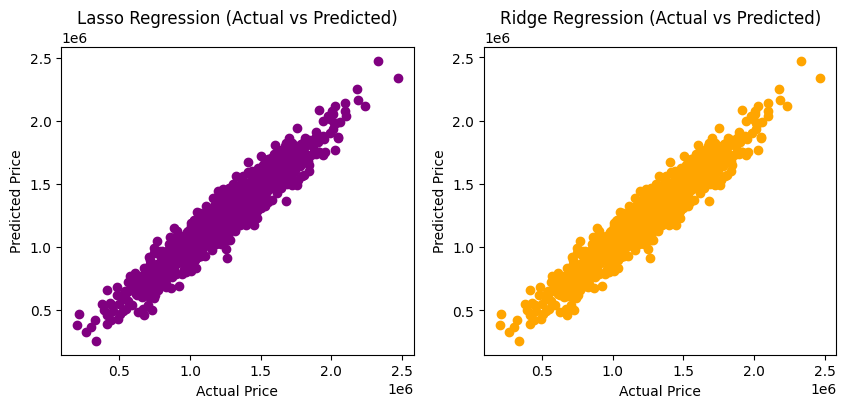

In [7]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_lasso, color='purple')
plt.title('Lasso Regression (Actual vs Predicted)')
plt.xlabel('Actual Price'); plt.ylabel('Predicted Price')
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_ridge, color='orange')
plt.title('Ridge Regression (Actual vs Predicted)')
plt.xlabel('Actual Price'); plt.ylabel('Predicted Price')
plt.show()